**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [1]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

import alegrete

### Visualizacao dos dados

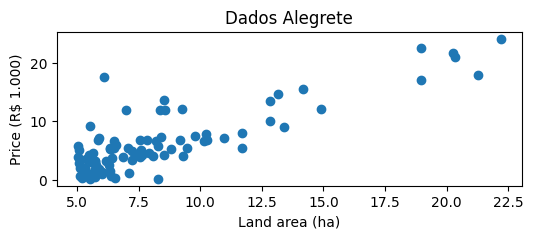

In [2]:
dataset = pd.read_csv('alegrete.csv', names=['Land area (ha)', 'Price (R$ 1.000)'])


#Gráfico dos dados
plt.figure(figsize=(6, 2))
plt.scatter(dataset['Land area (ha)'], dataset['Price (R$ 1.000)'])
plt.xlabel('Land area (ha)')
plt.ylabel('Price (R$ 1.000)')
plt.title('Dados Alegrete')
plt.show()

In [3]:
alegrete.compute_mse(0, 1, dataset)
dataset.iloc[:, 0]

,Land area (ha)
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
88,5.8707
89,5.3054
90,8.2934
91,13.3940


### Execucao da regressao linear e calculo do EQM por epoca/iteracao

Considere o parâmetro b o coeficiente linear (theta_0, visto em aula) e w o coeficiente angular (theta_1, visto em aula).

EQM final: 8.529433040552066


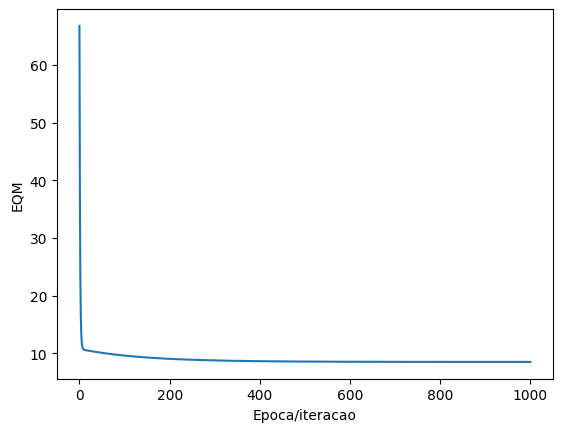

In [13]:
b_history, w_history = alegrete.fit(
    dataset, b=0, w=0,
    alpha=0.01, num_iterations=1000
)

# valores finais de theta0 e theta1
final_b, final_w = b_history[-1], w_history[-1]

mse_list = [alegrete.compute_mse(b, w, dataset) for b, w in zip(b_history, w_history)]
print(f"EQM final: {mse_list[-1]}")


plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: 1.1509374496448106*x + -3.3523656365077175


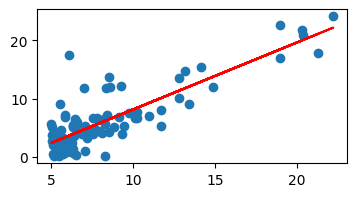

In [14]:
#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_w}*x + {final_b}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(dataset['Land area (ha)'], dataset['Price (R$ 1.000)'])

# plota a curva de ajuste
pred = final_w*dataset['Land area (ha)'] + final_b
plt.plot(dataset['Land area (ha)'], pred, c='r')
plt.show()

### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

In [ ]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# conjunto de dados
ax.scatter(dataset.iloc[:,0], dataset.iloc[:,1])

# linha com os valores iniciais dos parametros
pred = w_history[0]*dataset.iloc[:,0] + b_history[0]
line, = ax.plot(dataset.iloc[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = w_history[i] * dataset.iloc[:,0] + b_history[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)
HTML(ani.to_jshtml())

/tmp/ipython-input-646327532.py:18: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=1001.
  ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)
